# Figure 4 - Proof-of-concept CROP-seq KO15 screen

In [1]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/bmdm-stim/workflow/notebooks"

[1] "/home/sreichl/projects/bmdm-stim"

In [2]:
# source the figure theme, libraries and utility functions
source("./src/figure_theme.R")

In [3]:
library(Seurat, quietly=TRUE)
# for volcano plots
# library(EnhancedVolcano, quietly=TRUE)

Attaching SeuratObject


Attaching package: ‘Seurat’


The following object is masked from ‘package:Hmisc’:

    Key




# configs

In [4]:
# configs
data_path <- file.path('results','KO15')
results_path <- file.path('results','figures','figure_4')

# spi1 enrichment analysis
spi1_enrichment_terms <- read.csv(file=file.path('config','Spi1KO_enrichment_terms.csv'), row.names=1, header=TRUE)

# Spi1 volcano plot
spi1_volcano_proteins <- unlist(str_split('CD115 | CD64 | Mac-2 | CD14', ' \\| '))
spi1_volcano_genes <- unlist(str_split('Ptgds | Csf1r | Fcgr1 | Lgals3 | Cd14 | Cd74 | Cybb | Ly86 | Tyrobp | H2-Q6 | H2-K1 | Rpl24 | Id3 | Spp1 | Ctsl | H2-D1 | Akr1b3 | Lyz2', ' \\| '))

# DEA LFC matrix genes to highlight
KO15_DEA_LFC_genes <- list()
KO15_DEA_LFC_genes['untreated'] <- (str_split('Oasl2 | Isg20 | Isg15 | Irf7 | Rnf213 | Xaf1 | Usp18 | Trim30a | Ddx58 | Phf11d | Oas2 | Bst2 | Ifit2 | Ifit1 | Ifit3 | Zbp1 | Tgtp2 | mt-Nd1 | Cd74 | H2-Ab1 | Irf1 | Gbp2 | Ifi27', ' \\| '))
KO15_DEA_LFC_genes['LO28_2h'] <- (str_split('Isg20 | Irf7 | Phf11d | Rnf213 | Oasl2 | Xaf1 | Slfn4 | Bst2 | Lgals9 | Dhx58 | H2-Ab1 | Gbp2 | Ifi27 | Icam1 | Acod1 | Nfkbia | Gpr84 | Marcksl1 | Tnfsf9 | Il1b | Ccrl2 | Csf1 | Nlrp3', ' \\| '))
KO15_DEA_LFC_genes['LO28_6h'] <- (str_split('Oasl2 | Isg20 | Irf7 | Rnf213 | Xaf1 | Phf11d | Bst2 | Usp18 | Ddx58 | Oas2 | Ifit2 | Ifit1 | Ifit3 | Zbp1 | Slfn4 | Lgals9 | Dhx58 | Cd274 | Stat1 | Sp100 | Wfdc17 | Serinc3 | Ly86', ' \\| '))


# Listeria in NT
immune_genes <- c('Ifnb1','Nos2','Tnf', 'Tmem26')
epigenetic_potential_genes <- c('Rasgrp1','Mycl','Apol9a','Cxcl11','Ifitm10','Pacsin1','Prdm1','Cxcl3','Cxcl9')
genome_track_genes <- unlist(str_split('Il1b | Il6 | Cd38 | Rasgrp1 | Prdm1 | Cxcl11 | Cxcl3 | Gpr18 | Edn1 | Ifit2 | Mycl | Vcam1 |  Pla1a | Dll1 | Cd69 | Cd274', ' \\| '))
listeria_heatmap_genes <- unique(c(immune_genes,
                                   epigenetic_potential_genes, 
                                   genome_track_genes, 
                                   spi1_volcano_genes,
                                   unlist(unname(KO15_DEA_LFC_genes))
                                  )
                                )


In [5]:
# make directories if not exist
dir.create(results_path, showWarnings = FALSE, recursive = TRUE)

# load & prepare data

In [6]:
# loading Seurat object
KO15 <-readRDS(file = file.path(data_path,paste0("KO15_normalized_Seurat.rds")))
KO15

An object of class Seurat 
45322 features across 9153 samples within 5 assays 
Active assay: SCT (14187 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [7]:
KO15[['condition']] <- str_split_fixed(KO15$hto_demux, "_", 2)[,2]
unique(KO15$condition)

[1] "LO28_2h"   "untreated" "LO28_6h"

In [8]:
# colors for all perturbations
# KO_col = setNames(object = hue_pal()(length(unique(KO15$KO_call))),nm = unique(KO15$KO_call))
# KO_col["mNon-targeting"] <- "#D3D3D3"
KO_col

mStat1          mIrf8         mKdm1b mNon-targeting         mHdac6 
     "#F8766D"      "#E68613"      "#CD9600"      "#D3D3D3"      "#7CAE00" 
         mIrf9          mTyk2          mcJun         mStat2         mEp300 
     "#0CB702"      "#00BE67"      "#00C19A"      "#00BFC4"      "#00B8E7" 
        mKdm6b         mCsf1r          mRela          mSpi1         mCreb1 
     "#00A9FF"      "#8494FF"      "#C77CFF"      "#ED68ED"      "#FF61CC" 
         mJak1 
     "#FF68A1"

# Unsupervised Analysis

In [302]:
width <- 4
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

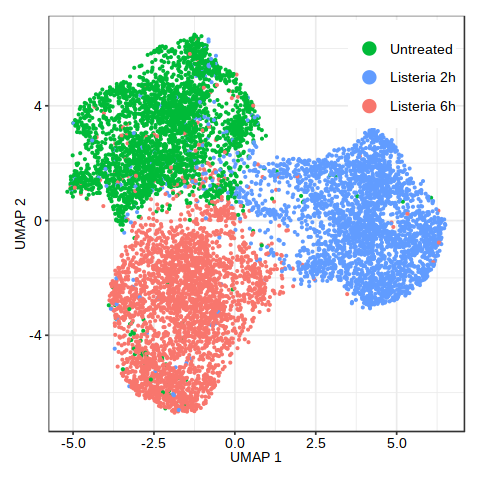

In [303]:
umap_p <- DimPlot(KO15, reduction='umap', label = FALSE, group.by='condition', pt.size=0.1)+
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
    macro_theme()+
    scale_color_manual(breaks=names(cond_colors), values=cond_colors, labels=treatment_format(names(cond_colors)), drop=FALSE) +
    theme(plot.title = element_blank(), legend.position = c(0.85, 0.86), legend.box = "horizontal")
umap_p

In [304]:
# save plot
ggsave_new(filename="unsupervised_analysis",
           results_path=results_path,
           plot=umap_p,
           width=width,
           height=height
          )

# Listeria treatment effect in NT

## Heatmap RNA & protein

In [305]:
conditions <- unique(KO15$condition)[c(2,1,3)]
conditions

[1] "untreated" "LO28_2h"   "LO28_6h"

In [306]:
# DefaultAssay(KO15) <- 'RNA'
DefaultAssay(KO15) <- 'SCT'
Idents(object = KO15) <- 'condition'

In [307]:
levels(KO15) <- conditions
levels(KO15)

[1] "untreated" "LO28_2h"   "LO28_6h"

In [308]:
# load all DEA RNA results for Non-targeting cells, filter for sign. genes (adj.p-value<stat_sign)
stat_sign <- 0.05
KO_gene <- "mNon-targeting"
top_n <- 20 # 100 50 20 10 # TODO: set final number here!

stat_genes <- c()
stat_genes_top <- c()

for (cond1 in conditions[-length(conditions)]){
    for (cond2 in conditions[(match(cond1,conditions)+1):length(conditions)]){
        print(paste(cond2, cond1))
        
        tmp_dea_genes <- read.csv(file=file.path(data_path, 'DEA_KO',paste0('KO15_DEA_RNA_',KO_gene,'_',cond2,'_',cond1,'.csv')), row.names=1)

        tmp_stat_genes <- rownames(tmp_dea_genes)[tmp_dea_genes$p_val_adj<stat_sign]
        tmp_stat_genes_top <- tmp_stat_genes[1:top_n] # they are already ordered by stat. sign.
        
        stat_genes <- union(stat_genes, tmp_stat_genes)
        stat_genes_top <- union(stat_genes_top, tmp_stat_genes_top)
    }
}

length(stat_genes)
length(stat_genes_top)

[1] "LO28_2h untreated"
[1] "LO28_6h untreated"
[1] "LO28_6h LO28_2h"


[1] 1372

[1] 44

In [309]:
# get normalized and scaled expression data
RNA_data <- GetAssayData(object = KO15, slot = "scale.data")

# filter for only NT cells
RNA_data <- RNA_data[, colnames(KO15)[KO15$KO_call=='mNon-targeting']]
dim(RNA_data)

[1] 3000  841

In [310]:
# export list of variable genes
write.csv(rownames(RNA_data), file=file.path(results_path,'small_screen_variable_genes.csv'))

In [311]:
# add external genes of interest and filter for overlap between highly variable genes and genes of interest
stat_genes2 <- intersect(rownames(RNA_data), union(stat_genes, listeria_heatmap_genes))
# stat_genes_top2 <- intersect(rownames(RNA_data), union(stat_genes_top, listeria_heatmap_genes))
stat_genes_top2 <- intersect(rownames(RNA_data), stat_genes_top)

In [312]:
# filter data for relevant genes
RNA_data_all <- RNA_data[stat_genes2,]
RNA_data_top <- RNA_data[stat_genes_top2,]

In [313]:
# hierarchical clustering to determine gene order
hc_all <- hclust(dist(RNA_data_all))
hc_top <- hclust(dist(RNA_data_top))

In [314]:
# hierarchical clustering to determine cell order for each condition separately
cells_ut <- colnames(KO15)[(KO15$KO_call=='mNon-targeting') & (KO15$condition=='untreated')]
cells_2h <- colnames(KO15)[(KO15$KO_call=='mNon-targeting') & (KO15$condition=='LO28_2h')]
cells_6h <- colnames(KO15)[(KO15$KO_call=='mNon-targeting') & (KO15$condition=='LO28_6h')]

hc_all_ut <- hclust(dist(t(RNA_data_all)[cells_ut,]))
hc_all_2h <- hclust(dist(t(RNA_data_all)[cells_2h,]))
hc_all_6h <- hclust(dist(t(RNA_data_all)[cells_6h,]))

hc_top_ut <- hclust(dist(t(RNA_data_top)[cells_ut,]))
hc_top_2h <- hclust(dist(t(RNA_data_top)[cells_2h,]))
hc_top_6h <- hclust(dist(t(RNA_data_top)[cells_6h,]))

# putting cell order together
cells_ordered_all <- c(cells_ut[hc_all_ut$order], cells_2h[hc_all_2h$order], cells_6h[hc_all_6h$order])
cells_ordered_top <- c(cells_ut[hc_top_ut$order], cells_2h[hc_top_2h$order], cells_6h[hc_top_6h$order])

In [318]:
width <- 6
height <- 8
options(repr.plot.width=width, repr.plot.height=height)

In [319]:
length(stat_genes_top2)

[1] 44

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



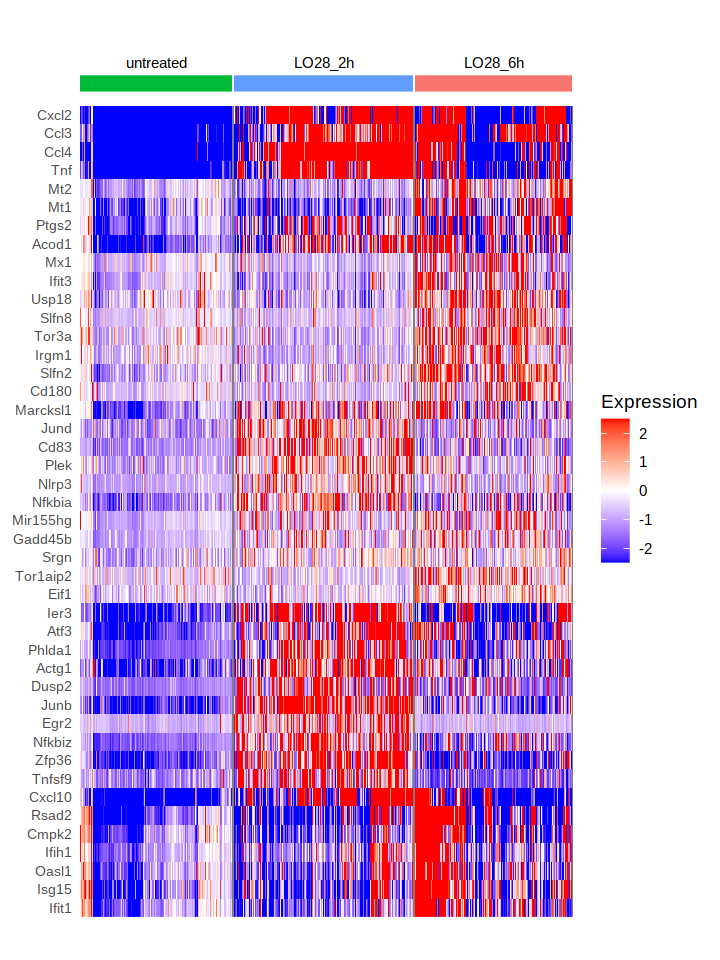

In [321]:
RNA_HM_p <- DoHeatmap(
  KO15,
  features = stat_genes_top2[hc_top$order],
    cells=cells_ordered_top,
#   group.by = "condition",
  group.bar = TRUE,
  group.colors = cond_colors,
  disp.min = -2.5,
  disp.max = 2.5,
  slot = "scale.data",
  assay = "SCT",
  label = TRUE,
  size = 3,
  hjust = 0.5,
  angle = 0,
  raster = TRUE,
  draw.lines = TRUE,
  lines.width = NULL,
  group.bar.height = 0.02,
  combine = T
) + 
scale_fill_gradientn(colors = c("blue", "white", "red")) +
guides(color="none") + # remove condition legend
theme(axis.text.y = element_text(size=8, hjust=1))#, legend.position="bottom") #before size=2 #+ 

RNA_HM_p 

In [323]:
# save plot
ggsave_new(filename=paste0("listeria_treatment_HM_rna_top",top_n),
           results_path=results_path,
           plot=RNA_HM_p,
           width=width,
           height=height
          )

# Spi1 KO perturbation effects in homeostasis and during treatment

## KO call UMAP highlighting Spi1

In [54]:
width <- 5
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

In [55]:
# remove leading 'm' for plot
KO15$KO_call_new <- gsub('^.', '', KO15$KO_call)

KO_col_new <- KO_col
names(KO_col_new) <- gsub('^.', '', names(KO_col_new))

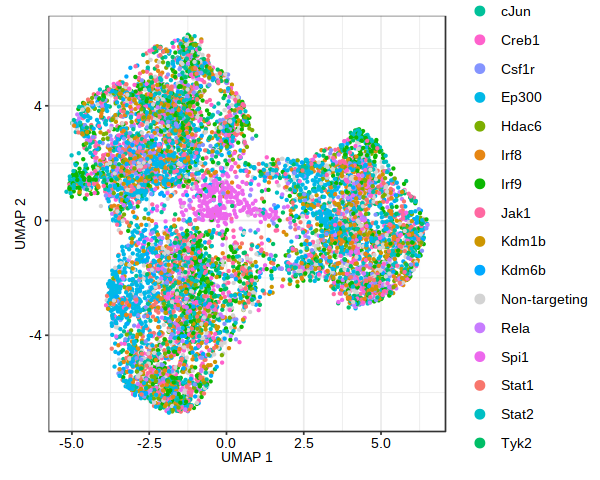

In [66]:
# make Spi1 UMAP plot
umap_spi1_p <- DimPlot(KO15, reduction='umap', label = FALSE, group.by='KO_call_new')+
    scale_color_manual(values=KO_col_new, drop=FALSE) +
    xlab("UMAP 1") +    
    ylab("UMAP 2") +
    macro_theme() +
    guides(colour = guide_legend(override.aes = list(size=2))) +
    theme(plot.title = element_blank())
umap_spi1_p

In [67]:
# save plot
ggsave_new(filename="spi1_umap",
           results_path=results_path,
           plot=umap_spi1_p,
           width=width,
           height=height
          )

## Spi1 KO enrichment plots in homeostasis & during treatment

In [324]:
# configs
# db <- 'WikiPathways_2019_Mouse'
# top_n <- 25

db <- spi1_enrichment_terms['Spi1_plot', 'database']
term_intersect <- str_split(string = spi1_enrichment_terms['Spi1_plot', 'terms'], pattern = ' \\| ')[[1]]

db
length(term_intersect)

[1] "BioPlanet_2019"

[1] 27

In [328]:
# load and aggregate enrichment results for INTERSECTING TERMS
spi1_enrich <- data.frame()
KO_gene <- 'mSpi1'

for (direction in c('up','down')){
    for (cond in c('untreated','LO28_6h')){
        tmp_enrichments <- read.delim(file=file.path(data_path, 
                                                     "enrichment_analysis", 
                                                     "DEA_condition",
                                                     paste0(cond,'_',KO_gene,'_',direction),
                                                     db,
                                                     paste0('Enrichr_',db,'_',cond,'_',KO_gene,'_',direction,'.csv')
                                                    ), 
                                      sep=',', header = TRUE)

        # remove unnecessary columns
        tmp_enrichments[,c('X','Gene_set','Overlap','P.value','Genes')] <- NULL

        # add annotation data
        tmp_enrichments$direction <- direction
        tmp_enrichments$condition <- cond
        tmp_enrichments$KO_gene <- KO_gene
        
        # keep intersecting terms
        tmp_enrichments <- tmp_enrichments[tmp_enrichments$Term %in% term_intersect,]

        if(nrow(spi1_enrich)==0){
            spi1_enrich <- tmp_enrichments
        }else{
            spi1_enrich <- rbind(spi1_enrich, tmp_enrichments)
        }
    }
}

spi1_enrich$group <- paste0(spi1_enrich$condition,'_',spi1_enrich$KO_gene)

In [329]:
# load and aggregate enrichment results for INTERSECTING TERMS
listeria_enrich <- data.frame()
cond <- 'LO28_6h'

for (direction in c('up','down')){
    for (KO_gene in c('mSpi1','mNon-targeting')){
        tmp_enrichments <- read.delim(file=file.path(data_path, 
                                                     "enrichment_analysis", 
                                                     "DEA_KO",
                                                     paste0(KO_gene,'_',cond,'_untreated_',direction),
                                                     db,
                                                     paste0('Enrichr_',db,'_',KO_gene,'_',cond,'_untreated_',direction,'.csv')
                                                    ), 
                                      sep=',', header = TRUE)

        # remove unnecessary columns
        tmp_enrichments[,c('X','Gene_set','Overlap','P.value','Genes')] <- NULL

        # add annotation data
        tmp_enrichments$direction <- direction
        tmp_enrichments$condition <- paste0(cond,'_untreated')
        tmp_enrichments$KO_gene <- KO_gene
        
        # keep intersecting terms
        tmp_enrichments <- tmp_enrichments[tmp_enrichments$Term %in% term_intersect,]

        if(nrow(listeria_enrich)==0){
            listeria_enrich <- tmp_enrichments
        }else{
            listeria_enrich <- rbind(listeria_enrich, tmp_enrichments)
        }
    }
}

listeria_enrich$group <- paste0(listeria_enrich$KO_gene,'_',listeria_enrich$condition)

In [330]:
# prepare data for plotting

# combine results
enrich_data <- rbind(spi1_enrich, listeria_enrich)

# order entries by adjusted p-value
enrich_data <- enrich_data[order(enrich_data$Adjusted.P.value),]

# remove stat. weaker duplicates within same comparison (ie group)
enrich_data <- enrich_data[!duplicated(enrich_data[,c('Term','group')]),]

# calculate & cap -log10(pvalue)
enrich_data$Adjusted.P.value <- -log10(enrich_data$Adjusted.P.value)
enrich_data$Adjusted.P.value[enrich_data$Adjusted.P.value>4] <- 4

# change sign of downregulated p-values
enrich_data <- as.data.table(enrich_data)

enrich_data[, Adjusted.P.value:=ifelse(direction=='up', Adjusted.P.value, -Adjusted.P.value)]

# set order of labels
y_axis_labels <- c('mNon-targeting_LO28_6h_untreated', 'mSpi1_LO28_6h_untreated', 'untreated_mSpi1', 'LO28_6h_mSpi1')
# y_axis_labels <- c('untreated_mSpi1', 'LO28_6h_mSpi1', 'mNon-targeting_LO28_6h_untreated', 'mSpi1_LO28_6h_untreated')

# remove WikiPathway IDs WP+numbers
enrich_data$Term <- remove_term_suffix(db=db, terms=enrich_data$Term)

In [331]:
enrich_data_tmp <- data.table(enrich_data)
# enrich_data_tmp[, Odds.Ratio:=ifelse(direction=='up', Odds.Ratio, -Odds.Ratio)]

enrich_data_df <- data.frame(dcast(
    data = enrich_data_tmp,
    formula = Term~group,
    value.var = "Odds.Ratio"
))
rownames(enrich_data_df) <- enrich_data_df$Term
enrich_data_df$Term <- NULL
enrich_data_df[is.na(enrich_data_df)] <- 1
enrich_data_df[enrich_data_df<1] <- 1
enrich_data_df <- log2(enrich_data_df)
print(max(enrich_data_df))
dim(enrich_data_df)
head(enrich_data_df)

[1] 5.933894


[1] 27  4

,LO28_6h_mSpi1,mNon.targeting_LO28_6h_untreated,mSpi1_LO28_6h_untreated,untreated_mSpi1
,<dbl>,<dbl>,<dbl>,<dbl>
AP-1 transcription factor network,2.651479,2.771193,1.809431,1.335977
Activation of IRF3/IRF7 mediated by TBK1/IKK epsilon,2.785833,3.228513,3.549964,3.076510
Antigen processing and presentation,3.785801,1.963340,2.284791,4.116191
Arachidonic acid metabolism,4.312991,2.258356,2.770842,4.037357
Cell cycle checkpoints,1.687225,1.765358,1.362790,0.000000
Cytokines and inflammatory response,4.476332,3.901453,3.629532,0.000000


In [332]:
hc_spi1_terms <- hclust(dist(enrich_data_df))
hc_spi1_groups <- hclust(dist(t(enrich_data_df)))

In [333]:
# ensure that the order of terms & clusters is kept
enrich_data$Term <- factor(enrich_data$Term,levels=rownames(enrich_data_df)[hc_spi1_terms$order])
# enrich_data$group <- factor(enrich_data$group, levels=colnames(enrich_data_df)[hc_spi1_groups$order])

In [357]:
width <- 6
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

In [358]:
y_axis_labels

[1] "mNon-targeting_LO28_6h_untreated" "mSpi1_LO28_6h_untreated"         
[3] "untreated_mSpi1"                  "LO28_6h_mSpi1"

In [359]:
y_axis_label_names <- c("NT", "Spi1", "UT", "6h")

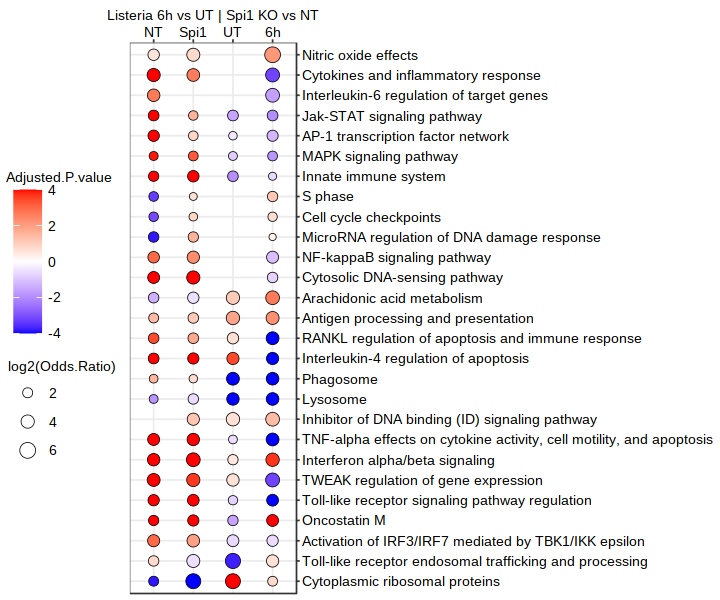

In [360]:
enr_p <- ggplot(enrich_data, aes(x=group, y=Term, fill=Adjusted.P.value, size=log2(Odds.Ratio)))+ 
geom_point(shape=21, stroke=0.25) +
scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0)+
scale_y_discrete(  position = "right") + 
scale_size_continuous(
            range = c(0.1,4), 
        breaks = c(2, 4, 6),
        limits = c(0, 6)
    ) + 
macro_theme() + 
xlab("Listeria 6h vs UT | Spi1 KO vs NT")+
scale_x_discrete(limits = y_axis_labels, labels=y_axis_label_names, position="top") +
theme(axis.text.x = element_text(angle = 0, hjust = 0.5, vjust=0),
      axis.text.y = element_text(angle = 0, hjust = 1, vjust=0.5),
      axis.title.y=element_blank(),
      legend.position="left",
#       legend.box = 'horizontal',
#       legend.direction = 'horizontal'
     )

enr_p

In [362]:
# save plot
ggsave_new(filename="spi1_enrichments",
           results_path=results_path,
           plot=enr_p,
           width=width,
           height=height
          )

# Mixscape results (LDA UMAP plots) per condition

In [9]:
KO_col_mixscape <- KO_col
names(KO_col_mixscape) <- sub('.', '', names(KO_col_mixscape))
names(KO_col_mixscape) <- sub('Non-targeting', 'NT', names(KO_col_mixscape))
KO_col_mixscape

Stat1      Irf8     Kdm1b        NT     Hdac6      Irf9      Tyk2      cJun 
"#F8766D" "#E68613" "#CD9600" "#D3D3D3" "#7CAE00" "#0CB702" "#00BE67" "#00C19A" 
    Stat2     Ep300     Kdm6b     Csf1r      Rela      Spi1     Creb1      Jak1 
"#00BFC4" "#00B8E7" "#00A9FF" "#8494FF" "#C77CFF" "#ED68ED" "#FF61CC" "#FF68A1"

In [10]:
# load data
KO15_mixscape_data <- list()
for (cond in unique(KO15$condition)){
    KO15_mixscape_data[[cond]] <- readRDS(file = file.path(data_path,'mixscape',cond,paste0("KO15_mixscape_subset_Seurat.rds")))
}

In [11]:
width <- 5
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

In [12]:
KO15_mixscape_plots <- list()

for (cond in unique(KO15$condition)){

    sub <- KO15_mixscape_data[[cond]]
#     Idents(sub) <- "mixscape_class"
#     sub$mixscape_class <- as.factor(sub$mixscape_class)
    sub$mixscape_class_new <- as.factor(sub(' KO', '', sub$mixscape_class))
    Idents(sub) <- "mixscape_class_new"

    KO15_mixscape_plots[[cond]] <- DimPlot(object = sub,
                                            reduction = "ldaumap",
                                            repel = T,
                                            label.size = 8, # 4
                                            label = T,
                                            cols = KO_col_mixscape,#col,
                                            pt.size=0.25,
                                            label.box=T) +
    scale_color_manual(values=KO_col_mixscape, drop=FALSE) +
    ylab("UMAP 2") +
    xlab("UMAP 1") +
    macro_theme()+
    ggtitle(treatment_format(cond)) +
    theme(plot.title = element_text(hjust=0.5))+
    NoLegend()
    
    # save plot
    ggsave_new(filename=paste0("mixscape_LDA_UMAP_",cond),
               results_path=results_path,
               plot=KO15_mixscape_plots[[cond]],
               width=width,
               height=height
              )
}

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



In [13]:
width <- 15
height <- 5
options(repr.plot.width=width, repr.plot.height=height)

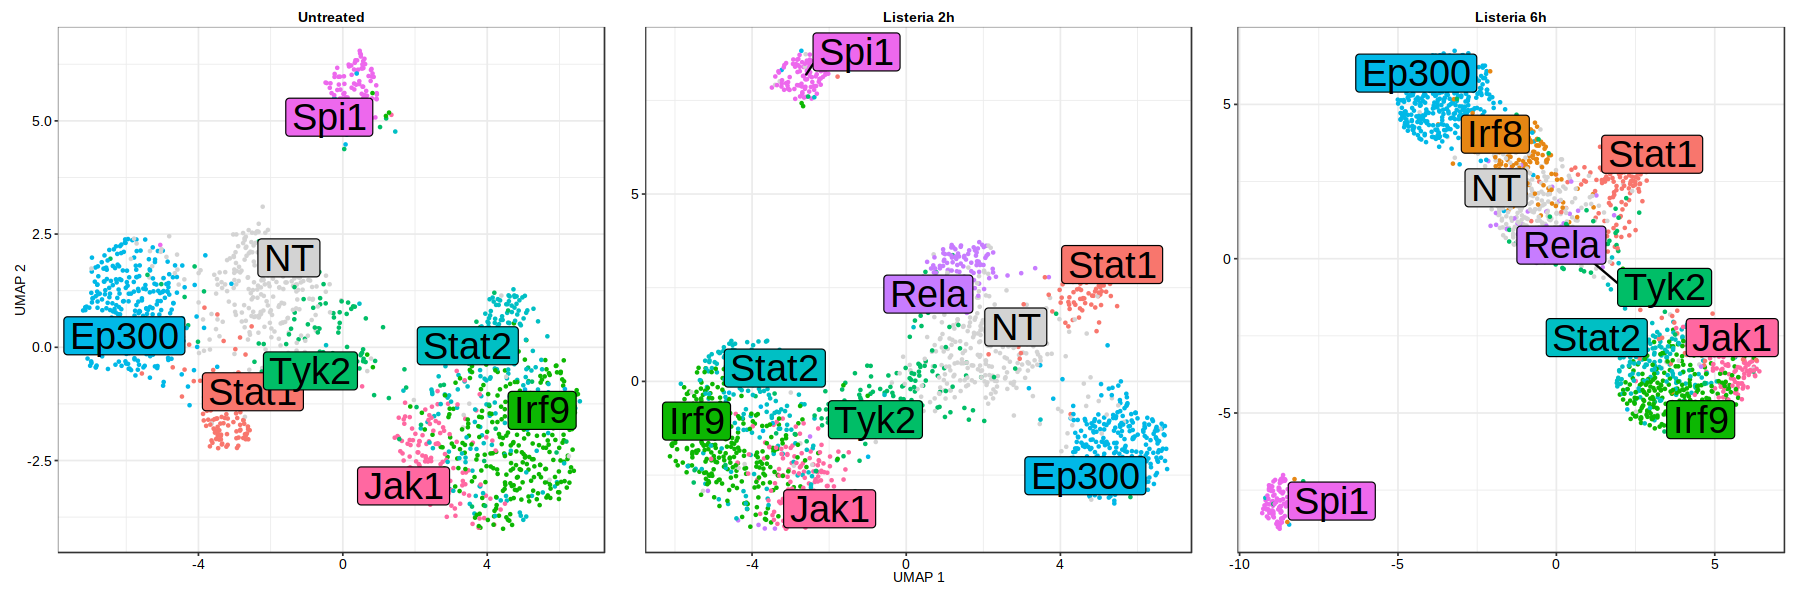

In [14]:
KO15_mixscape_plot <- ((KO15_mixscape_plots[['untreated']]+xlab("")) + 
                        (KO15_mixscape_plots[['LO28_2h']]+ylab("")) + 
                        (KO15_mixscape_plots[['LO28_6h']]+xlab("")+ylab("")))
KO15_mixscape_plot

In [15]:
# save panel plot
ggsave_new(filename="mixscape_LDA_UMAP_all",
           results_path=results_path,
           plot=KO15_mixscape_plot,
           width=width,
           height=height
          )

# LFC clustermap of mixscape DEA within conditions

In [221]:
# loading mixscape Seurat object
KO15 <-readRDS(file = file.path(data_path, 'unsupervised_mixscape',paste0("KO15_normalized_Seurat.rds")))
KO15

An object of class Seurat 
44530 features across 4978 samples within 5 assays 
Active assay: SCT (13395 features, 3000 variable features)
 4 other assays present: RNA, AB, gRNA, HTO
 2 dimensional reductions calculated: pca, umap

In [222]:
KO15[['condition']] <- str_split_fixed(KO15$hto_demux, "_", 2)[,2]
unique(KO15$condition)

[1] "LO28_2h"   "untreated" "LO28_6h"

In [223]:
KO15[["cond_KO"]] <- paste(KO15$condition,KO15$KO_call,sep="+")

In [224]:
KO15_DEA_LFC_data <- list()

for (cond in unique(KO15$condition)){

    KO15_DEA_LFC_data[[cond]] <- read.csv(file=file.path(data_path,'DEA_condition_mixscape',paste0('KO15_DEA_RNA_LFC_',cond,'.csv')), row.names=1)
        
    print(sum(is.na(KO15_DEA_LFC_data[[cond]]))/(dim(KO15_DEA_LFC_data[[cond]])[1]*dim(KO15_DEA_LFC_data[[cond]])[2])*100)

    # impute NA with 0 -> actually: below 0.1
    KO15_DEA_LFC_data[[cond]][is.na(KO15_DEA_LFC_data[[cond]])] <- 0
}

[1] 35.83515
[1] 36.34551
[1] 36.18597


In [226]:
# wrapper from here: https://stackoverflow.com/questions/52599180/partial-row-labels-heatmap-r

# heat refers to the original heatmap produced from the pheatmap() function
# kept.labels should be a vector of labels you wish to show
# repel.degree is a number in the range [0, 1], controlling how much the
# labels are spread out from one another

add.flag <- function(pheatmap,
                     kept.labels,
                     repel.degree) {

  # repel.degree = number within [0, 1], which controls how much 
  #                space to allocate for repelling labels.
  ## repel.degree = 0: spread out labels over existing range of kept labels
  ## repel.degree = 1: spread out labels over the full y-axis

  heatmap <- pheatmap$gtable

  new.label <- heatmap$grobs[[which(heatmap$layout$name == "row_names")]] 

  # keep only labels in kept.labels, replace the rest with ""
  new.label$label <- ifelse(new.label$label %in% kept.labels, 
                            new.label$label, "")

  # calculate evenly spaced out y-axis positions
  repelled.y <- function(d, d.select, k = repel.degree){
    # d = vector of distances for labels
    # d.select = vector of T/F for which labels are significant

    # recursive function to get current label positions
    # (note the unit is "npc" for all components of each distance)
    strip.npc <- function(dd){
      if(!"unit.arithmetic" %in% class(dd)) {
        return(as.numeric(dd))
      }

      d1 <- strip.npc(dd$arg1)
      d2 <- strip.npc(dd$arg2)
      fn <- dd$fname
      return(lazyeval::lazy_eval(paste(d1, fn, d2)))
    }

    full.range <- sapply(seq_along(d), function(i) strip.npc(d[i]))
    selected.range <- sapply(seq_along(d[d.select]), function(i) strip.npc(d[d.select][i]))

    return(unit(seq(from = max(selected.range) + k*(max(full.range) - max(selected.range)),
                    to = min(selected.range) - k*(min(selected.range) - min(full.range)), 
                    length.out = sum(d.select)), 
                "npc"))
  }
  new.y.positions <- repelled.y(new.label$y,
                                d.select = new.label$label != "")
  new.flag <- segmentsGrob(x0 = new.label$x,
                           x1 = new.label$x + unit(0.15, "npc"),
                           y0 = new.label$y[new.label$label != ""],
                           y1 = new.y.positions)

  # shift position for selected labels
  new.label$x <- new.label$x + unit(0.2, "npc")
  new.label$y[new.label$label != ""] <- new.y.positions

  # add flag to heatmap
  heatmap <- gtable::gtable_add_grob(x = heatmap,
                                   grobs = new.flag,
                                   t = 4, 
                                   l = 4
  )

  # replace label positions in heatmap
  heatmap$grobs[[which(heatmap$layout$name == "row_names")]] <- new.label

  # plot result
  grid.newpage()
  grid.draw(heatmap)

  # return a copy of the heatmap invisibly
  invisible(heatmap)
}


In [253]:
width <- 3
height <- 4
options(repr.plot.width=width, repr.plot.height=height)

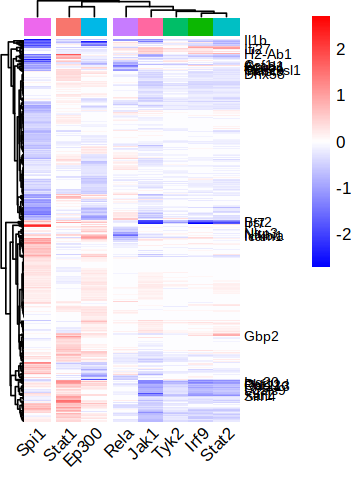

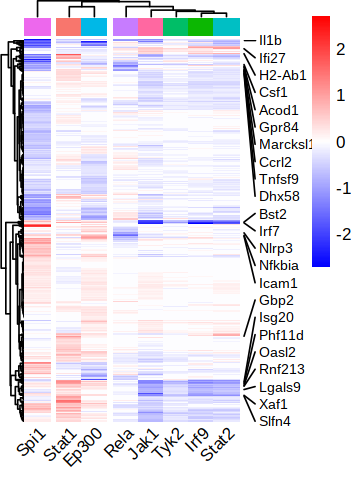

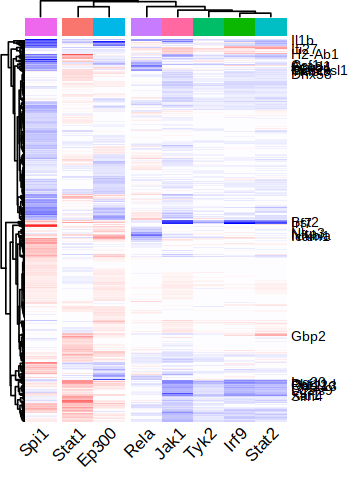

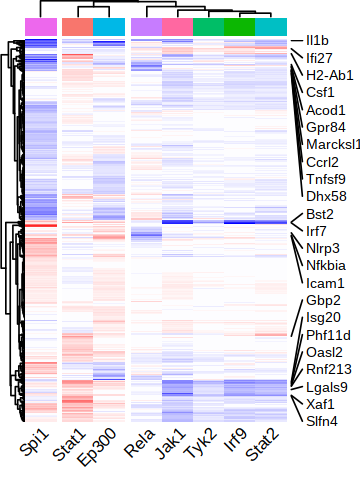

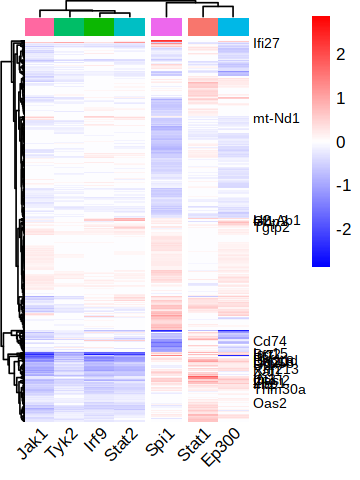

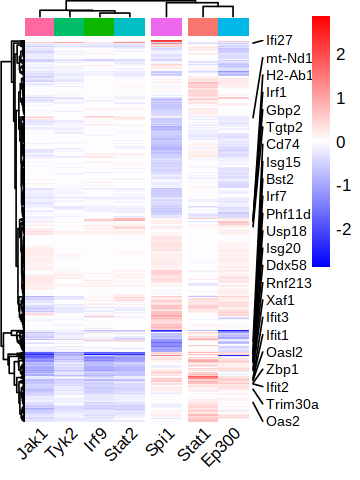

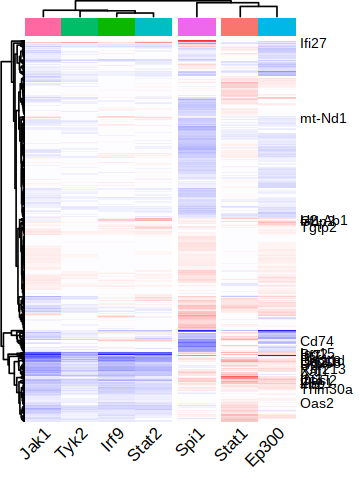

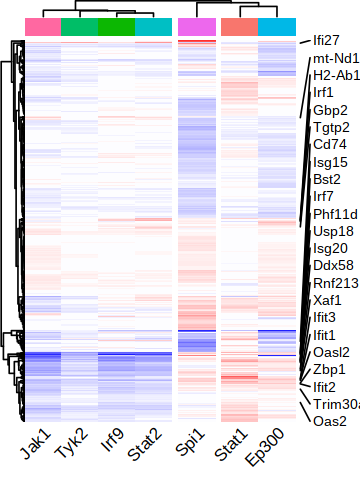

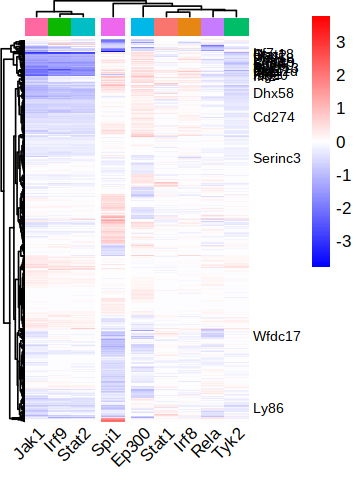

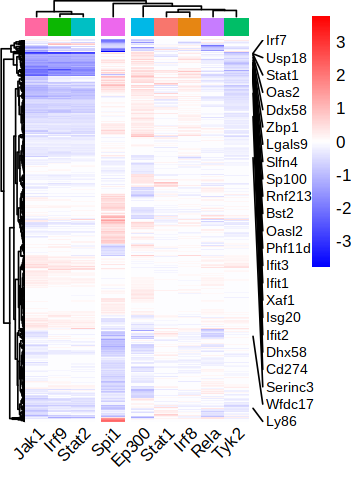

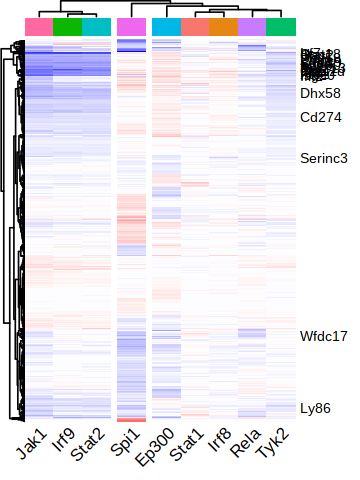

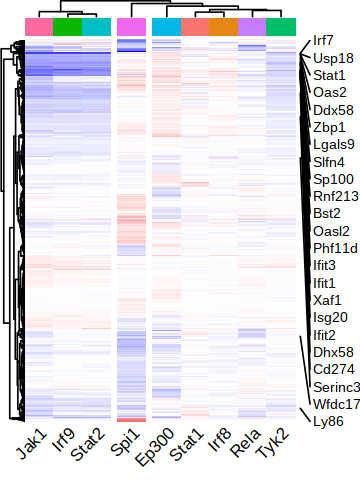

In [255]:
KO15_DEA_LFC_plots <- list()

for (cond in unique(KO15$condition)){
    
    labels_row <- rownames(KO15_DEA_LFC_data[[cond]])
    labels_row[!(labels_row %in% KO15_DEA_LFC_genes[[cond]])] <- ''
    
    fontsize_row <- 8
    
    labels_col <- sub('.', '', colnames(KO15_DEA_LFC_data[[cond]])) # removes first letter

    # plot individually with legends
    tmp_plot <- as.ggplot(add.flag(pheatmap(KO15_DEA_LFC_data[[cond]],
                                            breaks=seq(-max(abs(KO15_DEA_LFC_data[[cond]])), max(abs(KO15_DEA_LFC_data[[cond]])), length.out=200),
                                            color=colorRampPalette(c("blue", "white", "red"))(200),
                                            treeheight_col = 5,
                                            treeheight_row = 10,
                                            show_rownames=T,
                                            #show_colnames=F,
                                            labels_row = labels_row,
                                            labels_col = labels_col,
                                            angle_col = "45",
                                            fontsize_row=fontsize_row,
                                            annotation_col = data.frame('KO'=colnames(KO15_DEA_LFC_data[[cond]]), row.names=colnames(KO15_DEA_LFC_data[[cond]])),
                                            annotation_colors = list(KO=KO_col[colnames(KO15_DEA_LFC_data[[cond]])]),
#                                             cutree_rows = 3,
                                            cutree_cols = 3,
#                                             legend=F,
                                            annotation_legend = F,
                                            annotation_names_col = F
                        ), kept.labels = KO15_DEA_LFC_genes[[cond]],
         repel.degree = 1)) +
    ggtitle(treatment_format(cond)) +
    theme(plot.title = element_text(hjust=0.5))
    
    ggsave_new(filename=paste0("DEA_LFC_mixscape_",cond),
           results_path=results_path,
           plot=tmp_plot,
           width=width,
           height=height
          )
    
    # plot for panel
    KO15_DEA_LFC_plots[[cond]] <- as.ggplot(add.flag(pheatmap(KO15_DEA_LFC_data[[cond]],
                                            breaks=seq(-max(abs(KO15_DEA_LFC_data[[cond]])), max(abs(KO15_DEA_LFC_data[[cond]])), length.out=200),
                                            color=colorRampPalette(c("blue", "white", "red"))(200),
                                            treeheight_col = 5,
                                            treeheight_row = 10,
                                            show_rownames=T,
                                            #show_colnames=F,
                                            labels_row = labels_row,
                                            labels_col = labels_col,
                                            angle_col = "45",
                                            fontsize_row=fontsize_row,
                                            annotation_col = data.frame('KO'=colnames(KO15_DEA_LFC_data[[cond]]), row.names=colnames(KO15_DEA_LFC_data[[cond]])),
                                            annotation_colors = list(KO=KO_col[colnames(KO15_DEA_LFC_data[[cond]])]),
#                                             cutree_rows = 3,
                                            cutree_cols = 3,
                                            legend=F,
                                            annotation_legend = F,
                                            annotation_names_col = F
                        ), kept.labels = KO15_DEA_LFC_genes[[cond]],
         repel.degree = 1)) +
    ggtitle(treatment_format(cond)) +
    theme(plot.title = element_text(hjust=0.5))
}

In [243]:
width=9
height=4
options(repr.plot.width=width, repr.plot.height=height)

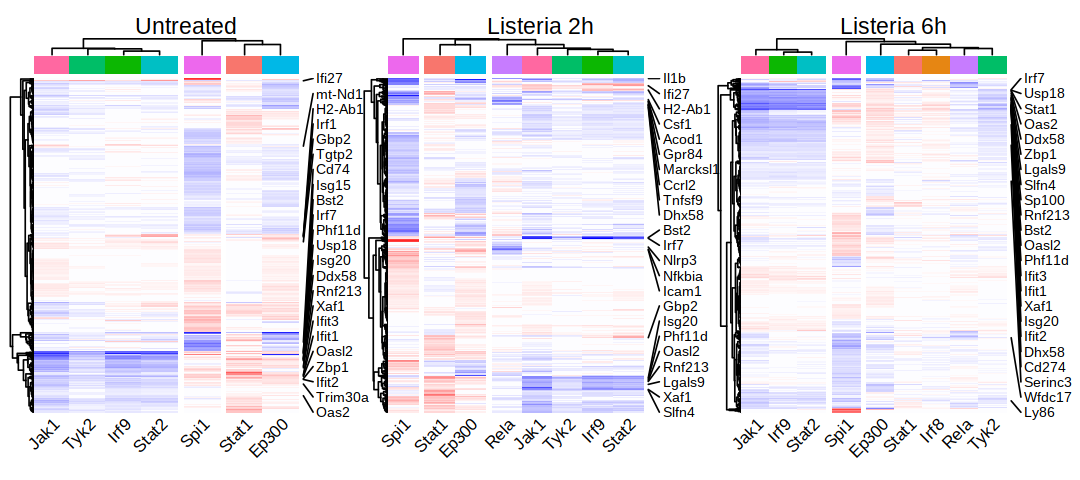

In [244]:
panel_DEA <- KO15_DEA_LFC_plots[['untreated']] + 
                        KO15_DEA_LFC_plots[['LO28_2h']] + 
                        KO15_DEA_LFC_plots[['LO28_6h']]
panel_DEA

In [245]:
# save plot
ggsave_new(filename="DEA_LFC_mixscape_all",
           results_path=results_path,
           plot=panel_DEA,
           width=width,
           height=height
          )

# Figure 4

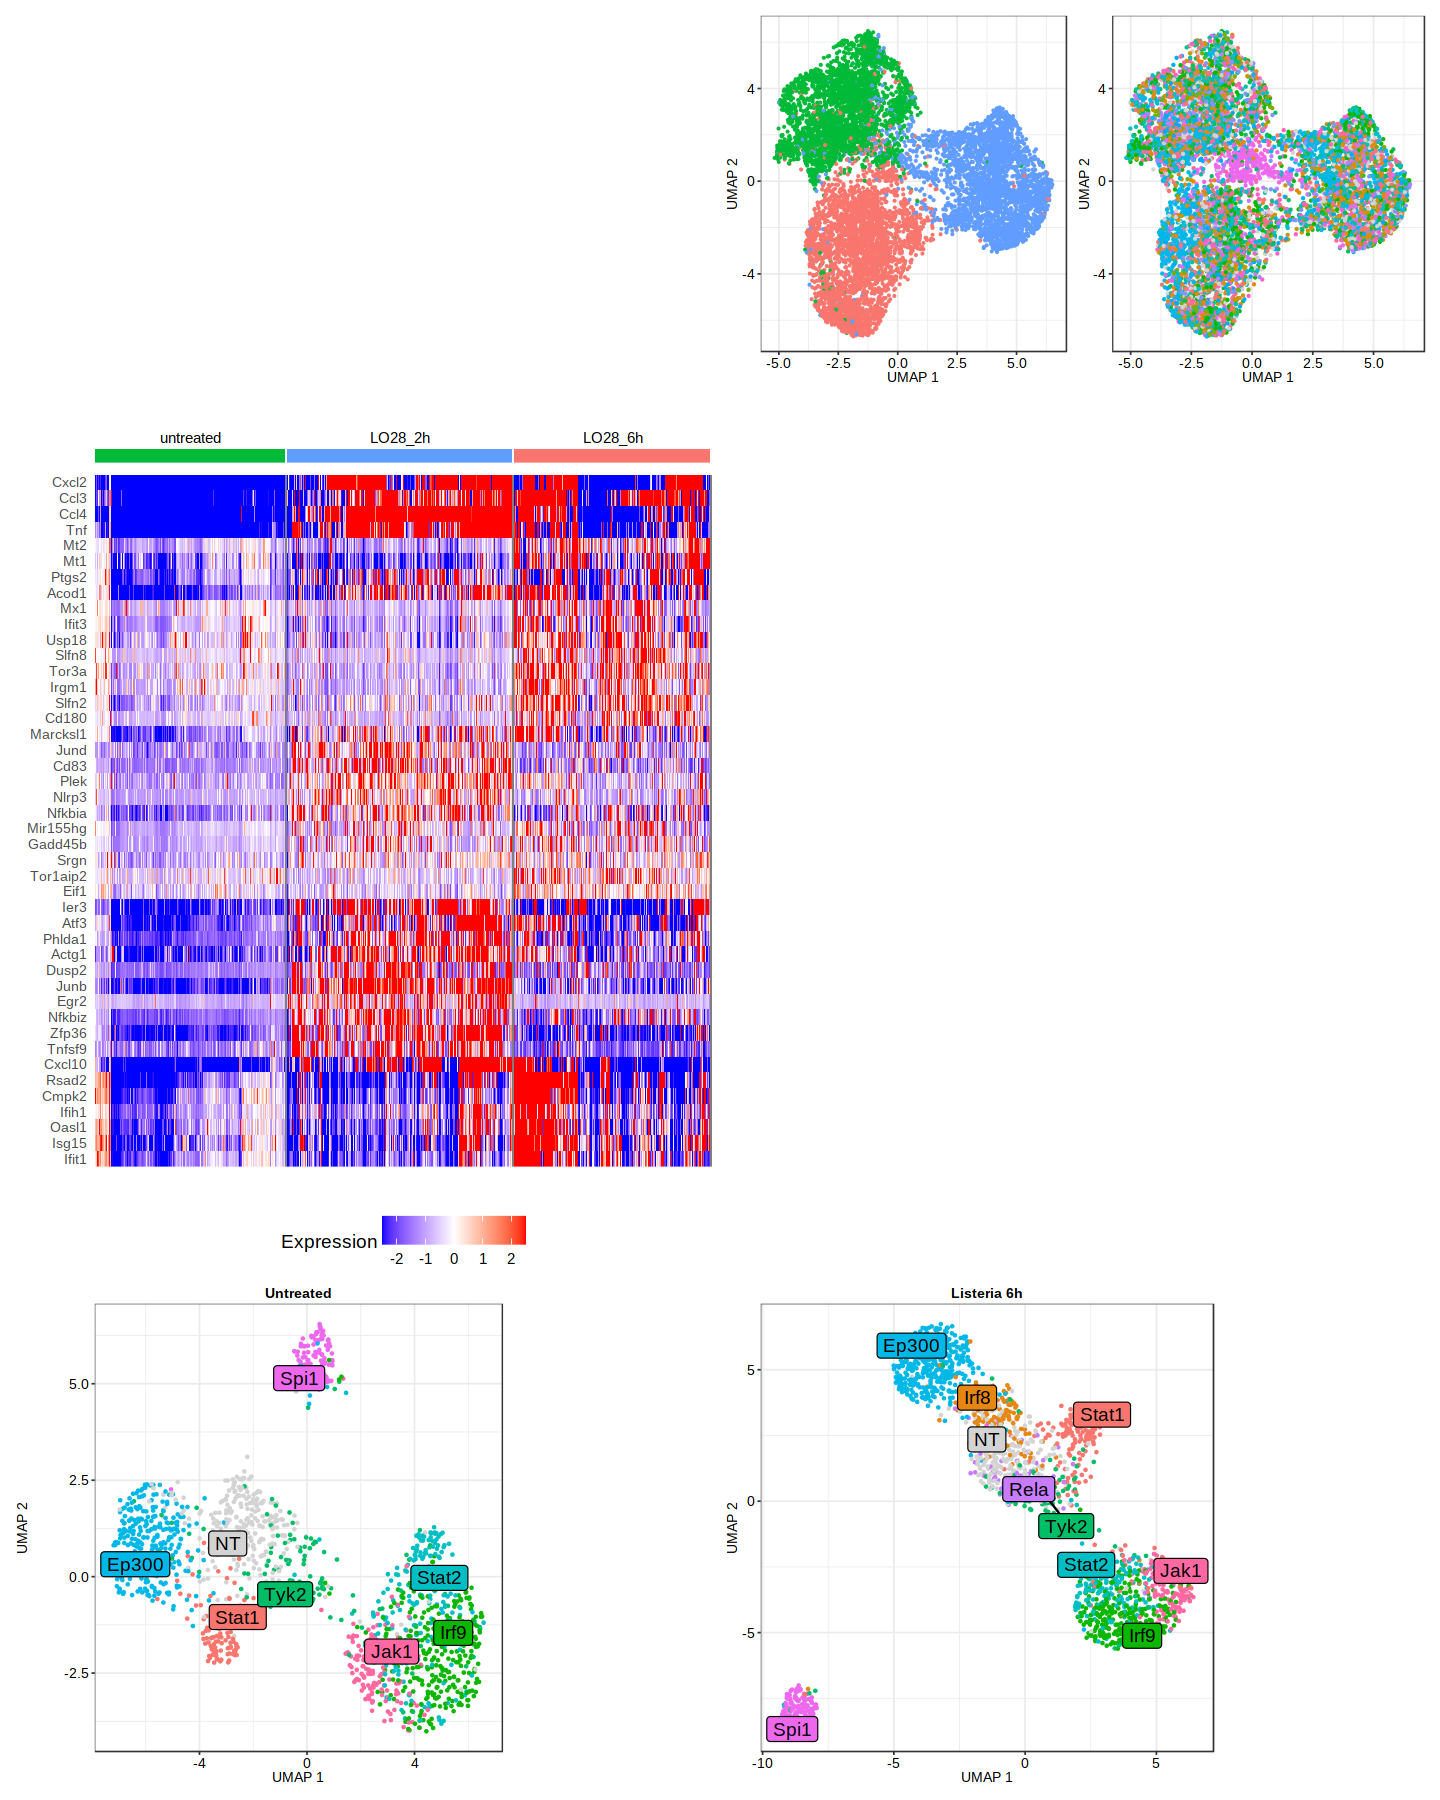

In [264]:
# SIZE
# A4 8.27 x 11.69 inches -> 8.25 x 11.5
width <- 12 # width 19cm -> 7.4 -> 8in
height <- 15 # height 15cm -> 6in 
options(repr.plot.width=width, repr.plot.height=height)


# LAYOUT
layout <- "
######AAABBB
######AAABBB
######AAABBB
CCCCCC######
CCCCCC######
CCCCCC######
CCCCCC######
CCCCCC######
CCCCCC######
CCCCCC######
EEEE##FFFF##
EEEE##FFFF##
EEEE##FFFF##
EEEE##FFFF##
"

# one letter is 4 high x 3 wide


# PLOT
fig4 <- (umap_p + theme(legend.position = "none")) + #A
(umap_spi1_p + theme(legend.position = "none")) + #B
RNA_HM_p  +  #C
# enr_p+theme(axis.text.y=element_blank(), axis.ticks.y=element_blank(), legend.position = "none")  +  #D
KO15_mixscape_plots[['untreated']]+xlab("")+ylab("")   +  #E
# KO15_DEA_LFC_plots[['untreated']]   +  #F
KO15_mixscape_plots[['LO28_6h']]+xlab("")+ylab("")  +  #G
# KO15_DEA_LFC_plots[['LO28_6h']]   +  #H
plot_layout(design = layout, guides = 'auto')
#      plot_annotation(tag_levels = 'a') & theme(plot.tag = element_text(size = 8))

fig4

In [265]:
# save plot
ggsave_new(filename="Fig4",
           results_path=results_path,
           plot=fig4,
           width=width,
           height=height
          )